In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.rcParams['figure.figsize'] = (12, 8)
np.random.seed(42)

In [36]:
dataset = pd.read_csv('../datasets/students_simple.csv')
print("Размер датасета:", dataset.shape)
print("Столбцы:", list(dataset.columns))
dataset

Размер датасета: (20, 10)
Столбцы: ['height', 'mass', 'income', 'iq', 'pages', 'age', 'bmi', 'work_exp', 'friends', 'test_time']


,height,mass,income,iq,pages,age,bmi,work_exp,friends,test_time
0,159,45,430,95,24,20,3.533,26,5,8.5
1,160,61,640,115,32,25,2.623,63,7,6.2
2,161,56,610,111,24,28,2.875,94,10,6.8
3,162,48,330,97,24,19,3.375,16,4,12.0
4,162,54,420,105,60,23,3.000,49,2,7.5
5,164,58,290,98,16,20,2.828,14,6,10.0
6,166,51,480,109,90,26,3.255,78,9,7.2
7,169,62,610,120,24,19,2.726,10,5,4.2
8,170,70,840,122,48,30,2.429,130,10,3.5
9,170,72,330,92,24,20,2.361,20,3,9.5


In [37]:
student_number = 21

first_column_index = student_number % 5
second_column_index = (student_number ** 2) % 5 + 5

available_columns = dataset.columns.tolist()

first_variable_name = available_columns[first_column_index]
second_variable_name = available_columns[second_column_index]

first_variable = dataset[first_variable_name]
second_variable = dataset[second_variable_name]

print(f'Анализируемая переменная 1: {first_variable_name} (индекс {first_column_index})')
print(f'Анализируемая переменная 2: {second_variable_name} (индекс {second_column_index})')
print(f'Номер варианта: {student_number}')

Анализируемая переменная 1: mass (индекс 1)
Анализируемая переменная 2: bmi (индекс 6)
Номер варианта: 21


# Лабораторная работа №2: Корреляционный анализ

## Задание 1: Расчет коэффициентов корреляции

In [38]:
def display_variable_statistics(variable_data):
    """
    Функция для вычисления и отображения статистических характеристик переменной
    """
    print("-" * 70)
    print(f"ОПИСАТЕЛЬНАЯ СТАТИСТИКА ДЛЯ ПЕРЕМЕННОЙ: {variable_data.name}")
    print("-" * 70)
    
    # Основные характеристики положения
    min_value = variable_data.min()
    max_value = variable_data.max()
    mean_value = variable_data.mean()
    median_value = variable_data.median()
    
    print(f"Минимальное значение:            {min_value:.4f}")
    print(f"Максимальное значение:           {max_value:.4f}")
    print(f"Арифметическое среднее:          {mean_value:.4f}")
    print(f"Медиана:                         {median_value:.4f}")
    
    # Характеристики разброса
    variance_value = variable_data.var()
    std_value = variable_data.std()
    
    print(f"Выборочная дисперсия:            {variance_value:.4f}")
    print(f"Стандартное отклонение:          {std_value:.4f}")
    
    # Модальное значение
    modal_values = variable_data.mode()
    if not modal_values.empty:
        print(f"Модальное значение:              {modal_values.iloc[0]:.4f}")
    else:
        print(f"Модальное значение:              не определено")
    
    # Квантили
    quartile_25 = variable_data.quantile(0.25)
    quartile_50 = variable_data.quantile(0.50)
    quartile_75 = variable_data.quantile(0.75)
    
    print(f"\nКВАНТИЛИ:")
    print(f"25-й процентиль (Q1):            {quartile_25:.4f}")
    print(f"50-й процентиль (Q2):            {quartile_50:.4f}")
    print(f"75-й процентиль (Q3):            {quartile_75:.4f}")
    
    # Интерквартильный размах
    iqr_value = quartile_75 - quartile_25
    print(f"Интерквартильный размах (IQR):   {iqr_value:.4f}")
    
    # Характеристики формы распределения
    skewness_value = variable_data.skew()
    kurtosis_value = variable_data.kurtosis()
    
    print(f"\nХАРАКТЕРИСТИКИ ФОРМЫ:")
    print(f"Коэффициент асимметрии:          {skewness_value:.4f}")
    print(f"Коэффициент эксцесса:            {kurtosis_value:.4f}")
    
    print("\n" + "-" * 70)
    print("ВИЗУАЛИЗАЦИЯ ДАННЫХ")
    print("-" * 70)
    
    # Определение оптимального количества интервалов
    bins_number = int(np.log2(variable_data.size) + 1)
    
    # Создание графиков
    figure, (hist_axis, cdf_axis) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Построение гистограммы
    hist_axis.hist(variable_data, bins=bins_number, alpha=0.75, 
                   color='lightsteelblue', edgecolor='navy', linewidth=1.2)
    hist_axis.set_title(f'Гистограмма распределения: {variable_data.name}', 
                        fontsize=12, fontweight='bold')
    hist_axis.set_xlabel('Значения переменной', fontsize=11)
    hist_axis.set_ylabel('Абсолютная частота', fontsize=11)
    hist_axis.grid(True, alpha=0.4, linestyle=':')
    
    # Добавление статистических линий
    hist_axis.axvline(mean_value, color='crimson', linestyle='--', linewidth=2,
                     label=f'Среднее: {mean_value:.2f}')
    hist_axis.axvline(median_value, color='forestgreen', linestyle='--', linewidth=2,
                     label=f'Медиана: {median_value:.2f}')
    hist_axis.legend(loc='upper right')
    
    # Построение эмпирической функции распределения
    sorted_values = np.sort(variable_data.dropna())
    cumulative_probabilities = np.arange(1, len(sorted_values) + 1) / len(sorted_values)
    
    cdf_axis.step(sorted_values, cumulative_probabilities, where='post', 
                  color='darkslateblue', linewidth=2.5, alpha=0.8)
    cdf_axis.set_title(f'Эмпирическая функция распределения: {variable_data.name}',
                       fontsize=12, fontweight='bold')
    cdf_axis.set_xlabel('Значения переменной', fontsize=11)
    cdf_axis.set_ylabel('Накопленная вероятность F(x)', fontsize=11)
    cdf_axis.grid(True, alpha=0.4, linestyle=':')
    cdf_axis.set_ylim(0, 1.05)
    
    # Отметки квантилей
    cdf_axis.axvline(quartile_25, color='darkorange', linestyle='-.', alpha=0.8,
                    label=f'Q1: {quartile_25:.2f}')
    cdf_axis.axvline(quartile_50, color='forestgreen', linestyle='-.', alpha=0.8,
                    label=f'Q2: {quartile_50:.2f}')
    cdf_axis.axvline(quartile_75, color='crimson', linestyle='-.', alpha=0.8,
                    label=f'Q3: {quartile_75:.2f}')
    cdf_axis.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

----------------------------------------------------------------------
ОПИСАТЕЛЬНАЯ СТАТИСТИКА ДЛЯ ПЕРЕМЕННОЙ: mass
----------------------------------------------------------------------
Минимальное значение:            45.0000
Максимальное значение:           95.0000
Арифметическое среднее:          67.4500
Медиана:                         68.0000
Выборочная дисперсия:            185.5237
Стандартное отклонение:          13.6207
Модальное значение:              68.0000

КВАНТИЛИ:
25-й процентиль (Q1):            57.5000
50-й процентиль (Q2):            68.0000
75-й процентиль (Q3):            73.7500
Интерквартильный размах (IQR):   16.2500

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:          0.2801
Коэффициент эксцесса:            -0.4285

----------------------------------------------------------------------
ВИЗУАЛИЗАЦИЯ ДАННЫХ
----------------------------------------------------------------------


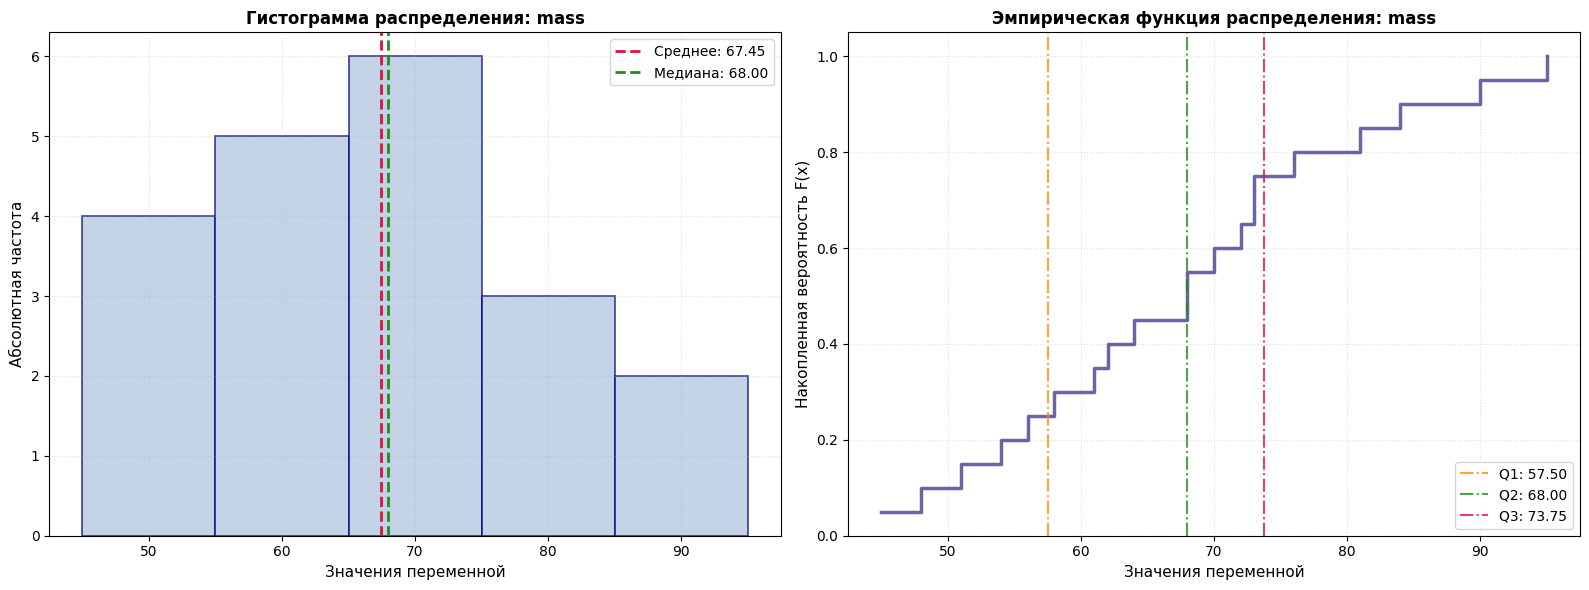

In [39]:
display_variable_statistics(first_variable)

----------------------------------------------------------------------
ОПИСАТЕЛЬНАЯ СТАТИСТИКА ДЛЯ ПЕРЕМЕННОЙ: bmi
----------------------------------------------------------------------
Минимальное значение:            2.0110
Максимальное значение:           3.5330
Арифметическое среднее:          2.6134
Медиана:                         2.5910
Выборочная дисперсия:            0.1902
Стандартное отклонение:          0.4361
Модальное значение:              2.3420

КВАНТИЛИ:
25-й процентиль (Q1):            2.3420
50-й процентиль (Q2):            2.5910
75-й процентиль (Q3):            2.8397
Интерквартильный размах (IQR):   0.4977

ХАРАКТЕРИСТИКИ ФОРМЫ:
Коэффициент асимметрии:          0.5928
Коэффициент эксцесса:            -0.2738

----------------------------------------------------------------------
ВИЗУАЛИЗАЦИЯ ДАННЫХ
----------------------------------------------------------------------


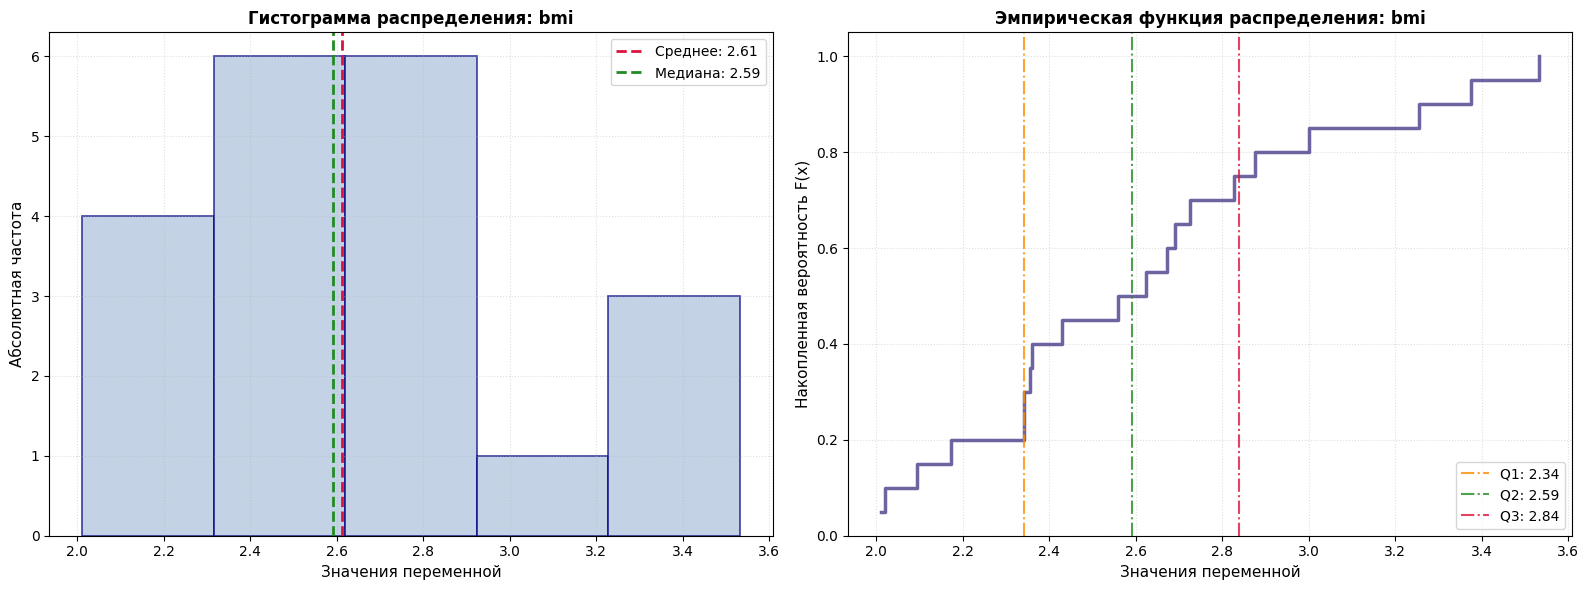

In [40]:
display_variable_statistics(second_variable)

In [41]:
print(f'Пропущенные значения в {first_variable_name}: {first_variable.isna().sum()}')
print(f'Пропущенные значения в {second_variable_name}: {second_variable.isna().sum()}')
print(f'Общий размер выборки: {len(first_variable)}')

print(f'\nКраткая сводка:')
print(f'{first_variable_name}: диапазон [{first_variable.min():.2f}, {first_variable.max():.2f}]')
print(f'{second_variable_name}: диапазон [{second_variable.min():.2f}, {second_variable.max():.2f}]')

Пропущенные значения в mass: 0
Пропущенные значения в bmi: 0
Общий размер выборки: 20

Краткая сводка:
mass: диапазон [45.00, 95.00]
bmi: диапазон [2.01, 3.53]


### Предварительный анализ распределений

Анализ гистограмм показывает, что обе исследуемые переменные (**mass** - масса тела и **bmi** - индекс массы тела) демонстрируют распределения, отличные от классических теоретических моделей. 

Переменная **mass** показывает относительно симметричное распределение с некоторой положительной асимметрией, что характерно для антропометрических данных. Переменная **bmi** также демонстрирует правостороннюю асимметрию, что типично для индексов, рассчитанных на основе физических измерений.

Учитывая природу данных (масса и ИМТ физически связаны), можно ожидать наличие корреляционной связи между этими переменными.

## Задание 2: Вычисление коэффициентов корреляции

### Теоретические основы коэффициентов корреляции


#### Коэффициент Фехнера

Пусть $C$ — число пар с одинаковыми знаками отклонений от медиан, $D$ — с разными. Тогда:
$$
r_F = \frac{C - D}{C + D}
$$


#### Коэффициент Пирсона

$$
r_P = \frac{\sum\limits_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2} \sqrt{\sum\limits_{i=1}^{n}(y_i - \bar{y})^2}}
$$

#### Коэффициент Спирмена (при отсутствии связанных рангов)

$$
\rho = 1 - \frac{6 \sum\limits_{i=1}^{n} d_i^2}{n(n^2 - 1)}, \quad d_i = R(x_i) - R(y_i)
$$


#### Коэффициент Кенделла

Пара наблюдений $(x_i, y_i)$ и $(x_j, y_j)$ называется:

- согласованной, если $(x_i - x_j)(y_i - y_j) > 0$,
- несогласованной, если $(x_i - x_j)(y_i - y_j) < 0$.

Пусть $C$ — число согласованных пар, $D$ — число несоглавсованных пар. Тогда:

$$
\tau = \frac{2(C - D)}{n(n - 1)}
$$

In [42]:
valid_data_mask = ~(first_variable.isna() | second_variable.isna())
x_values = first_variable[valid_data_mask].values
y_values = second_variable[valid_data_mask].values
sample_size = len(x_values)

print("=" * 75)
print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ МЕЖДУ ПЕРЕМЕННЫМИ")
print("=" * 75)
print(f"Первая переменная: {first_variable_name}")
print(f"Вторая переменная: {second_variable_name}")
print(f"Размер выборки для анализа: {sample_size}")
print("=" * 75)

# ========================================================================
# 1. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ФЕХНЕРА
# ========================================================================
print("\n1. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ФЕХНЕРА")
print("-" * 75)

mean_x = np.mean(x_values)
mean_y = np.mean(y_values)

deviation_signs_x = np.sign(x_values - mean_x)
deviation_signs_y = np.sign(y_values - mean_y)

concordant_signs = np.sum(deviation_signs_x * deviation_signs_y > 0)
discordant_signs = np.sum(deviation_signs_x * deviation_signs_y < 0)

fechner_coefficient = (concordant_signs - discordant_signs) / (concordant_signs + discordant_signs)

print(f"Среднее значение переменной {first_variable_name}: {mean_x:.4f}")
print(f"Среднее значение переменной {second_variable_name}: {mean_y:.4f}")
print(f"Количество пар с совпадающими знаками отклонений: {concordant_signs}")
print(f"Количество пар с различающимися знаками отклонений: {discordant_signs}")
print(f"Коэффициент корреляции Фехнера: {fechner_coefficient:.4f}")

# ========================================================================
# 2. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ПИРСОНА + ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ
# ========================================================================
print("\n2. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ПИРСОНА")
print("-" * 75)

pearson_correlation, pearson_p_value = stats.pearsonr(x_values, y_values)

print(f"Коэффициент корреляции Пирсона: {pearson_correlation:.4f}")
print(f"P-значение (двусторонний тест): {pearson_p_value:.6f}")

confidence_level = 0.05
fisher_z = np.arctanh(pearson_correlation)  # z-преобразование Фишера
standard_error = 1 / np.sqrt(sample_size - 3)  # стандартная ошибка
critical_z = stats.norm.ppf(1 - confidence_level/2)

ci_z_lower = fisher_z - critical_z * standard_error
ci_z_upper = fisher_z + critical_z * standard_error

ci_correlation_lower = np.tanh(ci_z_lower)
ci_correlation_upper = np.tanh(ci_z_upper)

print(f"95% доверительный интервал: [{ci_correlation_lower:.4f}, {ci_correlation_upper:.4f}]")

if pearson_p_value < 0.05:
    print("✓ Корреляция статистически значима на уровне α = 0.05")
else:
    print("✗ Корреляция статистически НЕ значима на уровне α = 0.05")

# ========================================================================
# 3. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ СПИРМЕНА
# ========================================================================
print("\n3. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ СПИРМЕНА")
print("-" * 75)

spearman_correlation, spearman_p_value = stats.spearmanr(x_values, y_values)

print(f"Коэффициент ранговой корреляции Спирмена: {spearman_correlation:.4f}")
print(f"P-значение (двусторонний тест): {spearman_p_value:.6f}")

if spearman_p_value < 0.05:
    print("✓ Ранговая корреляция статистически значима на уровне α = 0.05")
else:
    print("✗ Ранговая корреляция статистически НЕ значима на уровне α = 0.05")

# ========================================================================
# 4. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ КЕНДЕЛЛА (TAU)
# ========================================================================
print("\n4. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ КЕНДЕЛЛА")
print("-" * 75)

kendall_tau_coefficient, kendall_p_value = stats.kendalltau(x_values, y_values)

print(f"Коэффициент корреляции Кенделла (τ): {kendall_tau_coefficient:.4f}")
print(f"P-значение (двусторонний тест): {kendall_p_value:.6f}")

if kendall_p_value < 0.05:
    print("✓ Корреляция Кенделла статистически значима на уровне α = 0.05")
else:
    print("✗ Корреляция Кенделла статистически НЕ значима на уровне α = 0.05")

# ========================================================================
# СВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ
# ========================================================================
print("\n" + "=" * 80)
print("СВОДНАЯ ТАБЛИЦА КОЭФФИЦИЕНТОВ КОРРЕЛЯЦИИ")
print("=" * 80)

correlation_results = pd.DataFrame({
    'Метод корреляции': ['Фехнер', 'Пирсон', 'Спирмен', 'Кенделл (τ)'],
    'Коэффициент': [fechner_coefficient, pearson_correlation, spearman_correlation, kendall_tau_coefficient],
    'P-значение': [np.nan, pearson_p_value, spearman_p_value, kendall_p_value],
    'Статистически значима (α=0.05)': ['-', 
                                       'Да' if pearson_p_value < 0.05 else 'Нет',
                                       'Да' if spearman_p_value < 0.05 else 'Нет',
                                       'Да' if kendall_p_value < 0.05 else 'Нет']
})

print(correlation_results.to_string(index=False, float_format='{:.4f}'.format))
print("=" * 80)


КОРРЕЛЯЦИОННЫЙ АНАЛИЗ МЕЖДУ ПЕРЕМЕННЫМИ
Первая переменная: mass
Вторая переменная: bmi
Размер выборки для анализа: 20

1. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ФЕХНЕРА
---------------------------------------------------------------------------
Среднее значение переменной mass: 67.4500
Среднее значение переменной bmi: 2.6134
Количество пар с совпадающими знаками отклонений: 1
Количество пар с различающимися знаками отклонений: 19
Коэффициент корреляции Фехнера: -0.9000

2. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ ПИРСОНА
---------------------------------------------------------------------------
Коэффициент корреляции Пирсона: -0.9606
P-значение (двусторонний тест): 0.000000
95% доверительный интервал: [-0.9846, -0.9012]
✓ Корреляция статистически значима на уровне α = 0.05

3. КОЭФФИЦИЕНТ КОРРЕЛЯЦИИ СПИРМЕНА
---------------------------------------------------------------------------
Коэффициент ранговой корреляции Спирмена: -0.9849
P-значение (двусторонний тест): 0.000000
✓ Ранговая корреляция статистически значима на

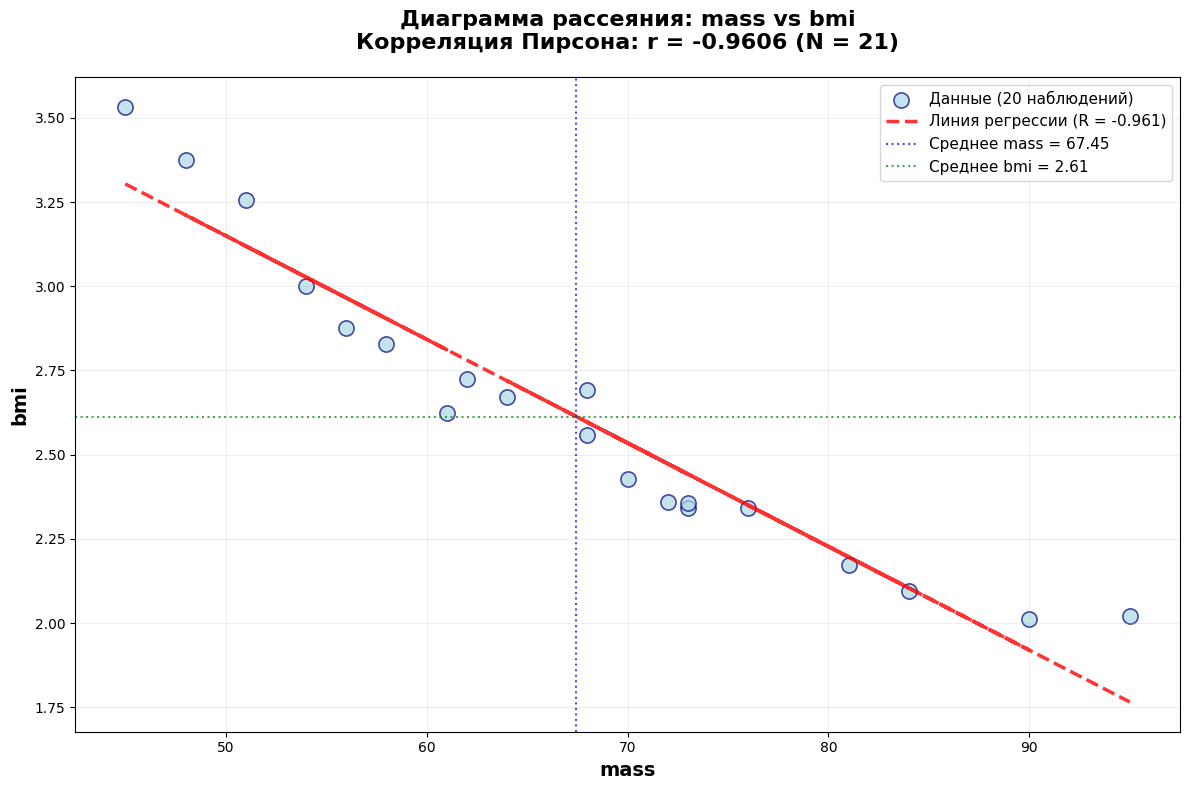


📊 Интерпретация корреляции:
   • Сила связи: Очень сильная
   • Направление: Отрицательная
   • Коэффициент детерминации R²: 0.9228 (92.3% объясненной дисперсии)


In [43]:
# ========================================================================
# ВИЗУАЛИЗАЦИЯ КОРРЕЛЯЦИОННОЙ СВЯЗИ
# ========================================================================
figure, axis = plt.subplots(figsize=(12, 8))

axis.scatter(x_values, y_values, alpha=0.7, s=120, 
            edgecolors='navy', linewidth=1.2, color='lightblue',
            label=f'Данные ({sample_size} наблюдений)')

regression_coeffs = np.polyfit(x_values, y_values, 1)
regression_line = np.poly1d(regression_coeffs)
axis.plot(x_values, regression_line(x_values), 
         color="red", linestyle="--", alpha=0.8, linewidth=2.5, 
         label=f'Линия регрессии (R = {pearson_correlation:.3f})')

axis.axvline(mean_x, color='blue', linestyle=':', alpha=0.7, 
            label=f'Среднее {first_variable_name} = {mean_x:.2f}')
axis.axhline(mean_y, color='green', linestyle=':', alpha=0.7, 
            label=f'Среднее {second_variable_name} = {mean_y:.2f}')

axis.set_xlabel(first_variable_name, fontsize=14, fontweight='bold')
axis.set_ylabel(second_variable_name, fontsize=14, fontweight='bold')
axis.set_title(f'Диаграмма рассеяния: {first_variable_name} vs {second_variable_name}\n' + 
              f'Корреляция Пирсона: r = {pearson_correlation:.4f} (N = {student_number})', 
              fontsize=16, fontweight='bold', pad=20)

axis.legend(loc='best', fontsize=11)
axis.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print(f"\n📊 Интерпретация корреляции:")
print(f"   • Сила связи: {'Очень сильная' if abs(pearson_correlation) > 0.9 else 'Сильная' if abs(pearson_correlation) > 0.7 else 'Умеренная'}")
print(f"   • Направление: {'Отрицательная' if pearson_correlation < 0 else 'Положительная'}")
print(f"   • Коэффициент детерминации R²: {pearson_correlation**2:.4f} ({pearson_correlation**2*100:.1f}% объясненной дисперсии)")


In [44]:
# ========================================================================
# РЕГРЕССИОННЫЙ АНАЛИЗ И МОДЕЛИРОВАНИЕ
# ========================================================================
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

print("=" * 80)
print("РЕГРЕССИОННЫЙ АНАЛИЗ: ПОСТРОЕНИЕ МОДЕЛЕЙ ЗАВИСИМОСТИ")
print("=" * 80)
print(f"Зависимая переменная (Y): {second_variable_name}")
print(f"Независимая переменная (X): {first_variable_name}")
print(f"Размер выборки: {sample_size}")
print("=" * 80)
# Подготовка данных для регрессионного моделирования
X_matrix = x_values.reshape(-1, 1)  # Независимая переменная в матричном виде
Y_vector = y_values.reshape(-1, 1)  # Зависимая переменная в векторном виде

# Создание диапазона значений для построения плавных линий регрессии
x_prediction_range = np.linspace(x_values.min(), x_values.max(), 100).reshape(-1, 1)

# Словарь для сохранения результатов различных моделей
regression_models_results = {}

# ============================================================================
# 1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w1*x + w0
# ============================================================================
print("\n1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w1*x + w0")
print("-"*70)

linear_model = LinearRegression()
linear_model.fit(X, Y)
y_pred_linear = linear_model.predict(X)
y_range_linear = linear_model.predict(x_range)

w0_linear = linear_model.intercept_[0]
w1_linear = linear_model.coef_[0][0]

r2_linear = r2_score(Y, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(Y, y_pred_linear))
mae_linear = mean_absolute_error(Y, y_pred_linear)

print(f"Уравнение: y = {w1_linear:.4f}*x + {w0_linear:.4f}")
print(f"Коэффициент детерминации R²: {r2_linear:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_linear:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_linear:.4f}")
results['Линейная'] = {
    'model': linear_model,
    'y_pred': y_pred_linear,
    'y_range': y_range_linear,
    'equation': f"y = {w1_linear:.4f}*x + {w0_linear:.4f}",
    'r2': r2_linear,
    'rmse': rmse_linear,
    'mae': mae_linear
}

# ============================================================================
# 2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w2*x^2 + w1*x + w0
# ============================================================================
print("\n2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w2*x² + w1*x + w0")
print("-"*70)

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
x_range_poly = poly_features.transform(x_range)

quadratic_model = LinearRegression()
quadratic_model.fit(X_poly, Y)
y_pred_quadratic = quadratic_model.predict(X_poly)
y_range_quadratic = quadratic_model.predict(x_range_poly)

w0_quadratic = quadratic_model.intercept_[0]
w1_quadratic = quadratic_model.coef_[0][1]
w2_quadratic = quadratic_model.coef_[0][2]

r2_quadratic = r2_score(Y, y_pred_quadratic)
rmse_quadratic = np.sqrt(mean_squared_error(Y, y_pred_quadratic))
mae_quadratic = mean_absolute_error(Y, y_pred_quadratic)

print(f"Уравнение: y = {w2_quadratic:.4f}*x² + {w1_quadratic:.4f}*x + {w0_quadratic:.4f}")
print(f"Коэффициент детерминации R²: {r2_quadratic:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_quadratic:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_quadratic:.4f}")

results['Квадратичная'] = {
    'model': quadratic_model,
    'y_pred': y_pred_quadratic,
    'y_range': y_range_quadratic,
    'equation': f"y = {w2_quadratic:.4f}*x² + {w1_quadratic:.4f}*x + {w0_quadratic:.4f}",
    'r2': r2_quadratic,
    'rmse': rmse_quadratic,
    'mae': mae_quadratic
}

# ============================================================================
# 3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w1/x + w0
# ============================================================================
print("\n3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w1/x + w0")
print("-"*70)

# Преобразуем x в 1/x
X_hyperbolic = 1 / X
x_range_hyperbolic = 1 / x_range

hyperbolic_model = LinearRegression()
hyperbolic_model.fit(X_hyperbolic, Y)
y_pred_hyperbolic = hyperbolic_model.predict(X_hyperbolic)
y_range_hyperbolic = hyperbolic_model.predict(x_range_hyperbolic)

w0_hyperbolic = hyperbolic_model.intercept_[0]
w1_hyperbolic = hyperbolic_model.coef_[0][0]

r2_hyperbolic = r2_score(Y, y_pred_hyperbolic)
rmse_hyperbolic = np.sqrt(mean_squared_error(Y, y_pred_hyperbolic))
mae_hyperbolic = mean_absolute_error(Y, y_pred_hyperbolic)

print(f"Уравнение: y = {w1_hyperbolic:.4f}/x + {w0_hyperbolic:.4f}")
print(f"Коэффициент детерминации R²: {r2_hyperbolic:.4f}")
print(f"Среднеквадратичная ошибка RMSE: {rmse_hyperbolic:.4f}")
print(f"Среднее абсолютное отклонение MAE: {mae_hyperbolic:.4f}")

results['Гиперболическая'] = {
    'model': hyperbolic_model,
    'y_pred': y_pred_hyperbolic,
    'y_range': y_range_hyperbolic,
    'equation': f"y = {w1_hyperbolic:.4f}/x + {w0_hyperbolic:.4f}",
    'r2': r2_hyperbolic,
    'rmse': rmse_hyperbolic,
    'mae': mae_hyperbolic
}

# ============================================================================
# 4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w0 * w1^x
# ============================================================================
print("\n4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w0 * w1^x")
print("-"*70)

# Для показательной регрессии используем логарифмическое преобразование
# log(y) = log(w0) + x*log(w1)
# Это линейная регрессия в логарифмическом масштабе

# Проверяем, что все значения y положительные
if np.all(Y > 0):
    Y_log = np.log(Y)
    
    exponential_model = LinearRegression()
    exponential_model.fit(X, Y_log)
    y_log_pred = exponential_model.predict(X)
    y_range_log_pred = exponential_model.predict(x_range)
    
    # Преобразуем обратно из логарифмического масштаба
    y_pred_exponential = np.exp(y_log_pred)
    y_range_exponential = np.exp(y_range_log_pred)
    
    # Вычисляем коэффициенты
    log_w0 = exponential_model.intercept_[0]
    log_w1 = exponential_model.coef_[0][0]
    
    w0_exponential = np.exp(log_w0)
    w1_exponential = np.exp(log_w1)
    
    r2_exponential = r2_score(Y, y_pred_exponential)
    rmse_exponential = np.sqrt(mean_squared_error(Y, y_pred_exponential))
    mae_exponential = mean_absolute_error(Y, y_pred_exponential)
    
    print(f"Уравнение: y = {w0_exponential:.4f} * {w1_exponential:.4f}^x")
    print(f"Коэффициент детерминации R²: {r2_exponential:.4f}")
    print(f"Среднеквадратичная ошибка RMSE: {rmse_exponential:.4f}")
    print(f"Среднее абсолютное отклонение MAE: {mae_exponential:.4f}")

    results['Показательная'] = {
        'model': exponential_model,
        'y_pred': y_pred_exponential,
        'y_range': y_range_exponential,
        'equation': f"y = {w0_exponential:.4f} * {w1_exponential:.4f}^x",
        'r2': r2_exponential,
        'rmse': rmse_exponential,
        'mae': mae_exponential
    }
else:
    print("ПРЕДУПРЕЖДЕНИЕ: Показательная регрессия требует положительных значений Y")
    results['Показательная'] = None

# ============================================================================
# СВОДНАЯ ТАБЛИЦА
# ============================================================================
print("\n" + "="*70)
print("СВОДНАЯ ТАБЛИЦА МОДЕЛЕЙ РЕГРЕССИИ")
print("="*70)

summary_data = []
for model_name, result in results.items():
    if result is not None:
        summary_data.append({
            'Модель': model_name,
            'R² (коэф. детерминации)': f"{result['r2']:.4f}",
            'RMSE': f"{result['rmse']:.4f}",
            'MAE': f"{result['mae']:.4f}",
            'Уравнение': result['equation']
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))
print("="*70)

# Определяем лучшую модель
best_model_name = max(
    [(name, res['r2']) for name, res in results.items() if res is not None],
    key=lambda x: x[1]
)[0]
print(f"\nЛучшая модель по R²: {best_model_name}")
print("="*70)


РЕГРЕССИОННЫЙ АНАЛИЗ: ПОСТРОЕНИЕ МОДЕЛЕЙ ЗАВИСИМОСТИ
Зависимая переменная (Y): bmi
Независимая переменная (X): mass
Размер выборки: 20

1. ЛИНЕЙНАЯ РЕГРЕССИЯ: y = w1*x + w0
----------------------------------------------------------------------
Уравнение: y = -0.0308*x + 4.6881
Коэффициент детерминации R²: 0.9228
Среднеквадратичная ошибка RMSE: 0.1181
Среднее абсолютное отклонение MAE: 0.0969

2. КВАДРАТИЧНАЯ РЕГРЕССИЯ: y = w2*x² + w1*x + w0
----------------------------------------------------------------------
Уравнение: y = 0.0005*x² + -0.0990*x + 6.9596
Коэффициент детерминации R²: 0.9779
Среднеквадратичная ошибка RMSE: 0.0632
Среднее абсолютное отклонение MAE: 0.0461

3. ГИПЕРБОЛИЧЕСКАЯ РЕГРЕССИЯ: y = w1/x + w0
----------------------------------------------------------------------
Уравнение: y = 135.2427/x + 0.5275
Коэффициент детерминации R²: 0.9791
Среднеквадратичная ошибка RMSE: 0.0614
Среднее абсолютное отклонение MAE: 0.0476

4. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ: y = w0 * w1^x
----------

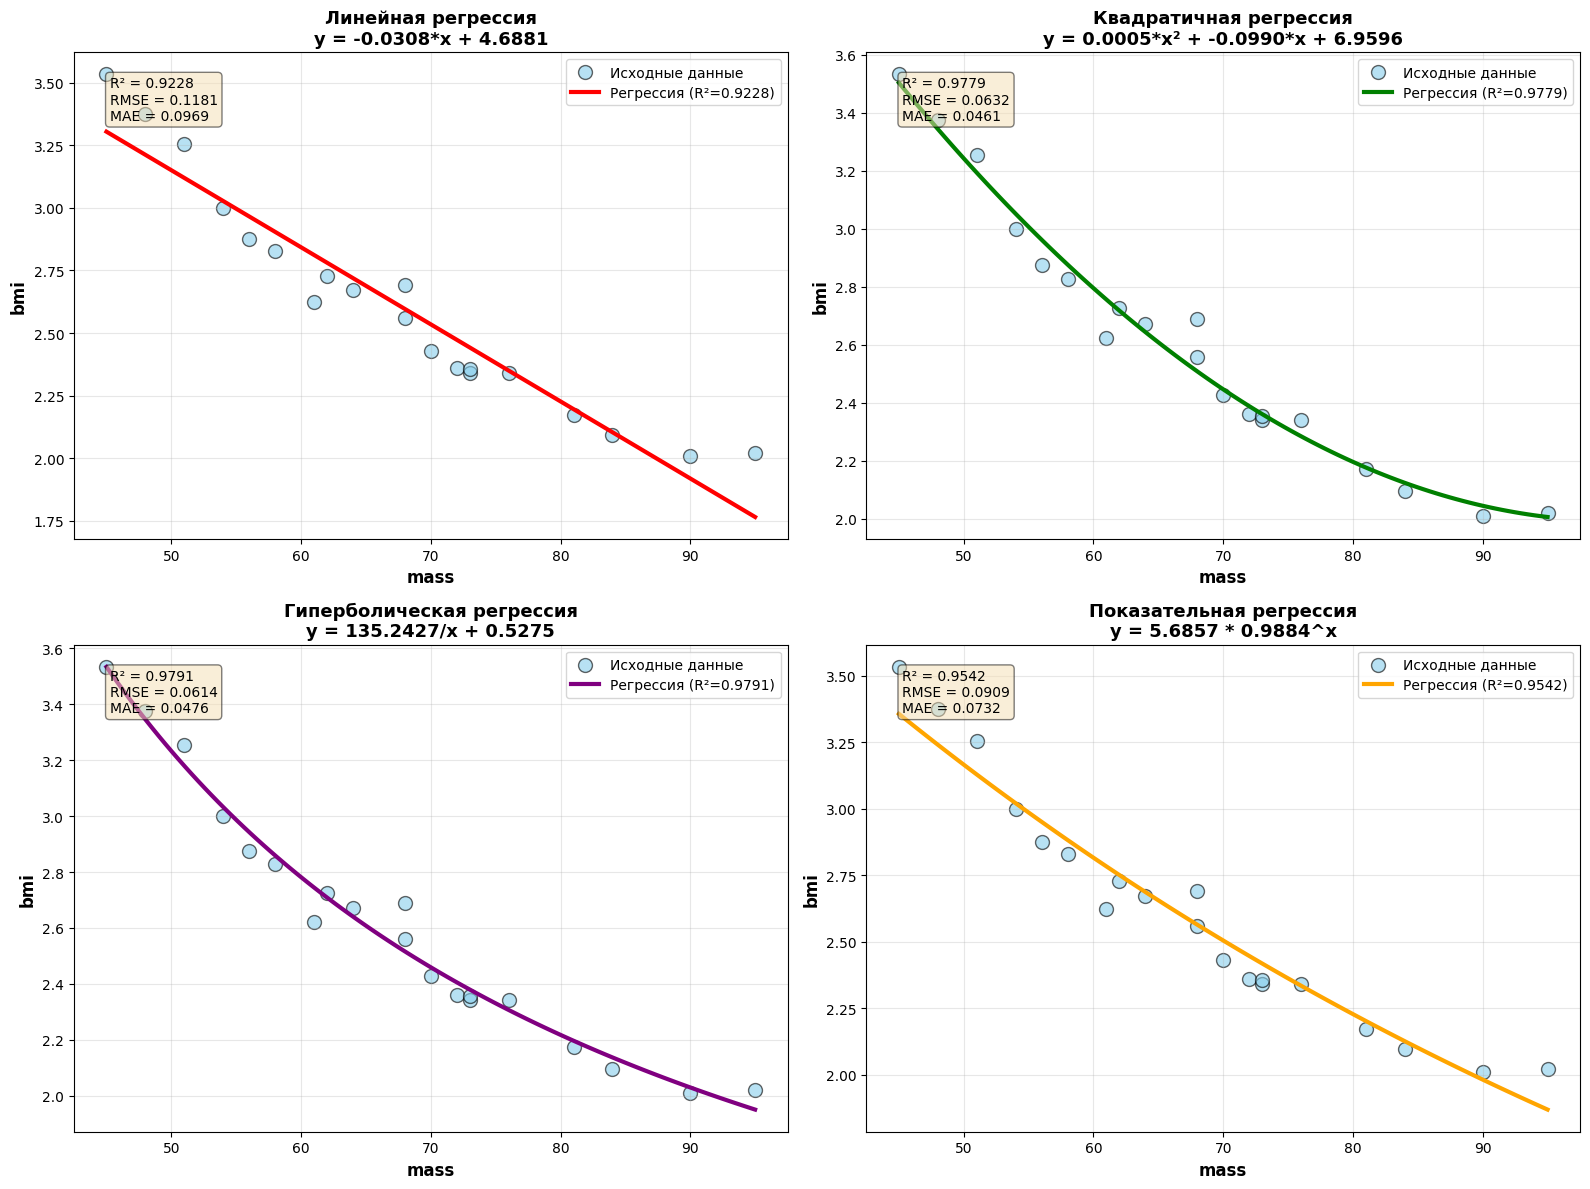

In [45]:
# Визуализация всех моделей регрессии
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['red', 'green', 'purple', 'orange']
model_names = list(results.keys())

for idx, (model_name, color) in enumerate(zip(model_names, colors)):
    ax = axes[idx]
    
    # Проверяем, что модель построена
    if results[model_name] is not None:
        result = results[model_name]
        
        # Исходные данные
        ax.scatter(x, y, alpha=0.6, s=100, edgecolors='black', 
                   linewidth=1, label='Исходные данные', color='skyblue')
        
        # Линия регрессии
        ax.plot(x_range, result['y_range'], color=color, linewidth=3, 
                label=f'Регрессия (R²={result["r2"]:.4f})')
        
        # Оформление
        ax.set_xlabel(col_1.name, fontsize=12, fontweight='bold')
        ax.set_ylabel(col_2.name, fontsize=12, fontweight='bold')
        ax.set_title(f'{model_name} регрессия\n{result["equation"]}', 
                     fontsize=13, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)
        
        # Добавляем текст с метриками
        textstr = f'R² = {result["r2"]:.4f}\nRMSE = {result["rmse"]:.4f}\nMAE = {result["mae"]:.4f}'
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
                verticalalignment='top', bbox=props)
    else:
        ax.text(0.5, 0.5, 'Модель не построена', 
                ha='center', va='center', fontsize=14, transform=ax.transAxes)
        ax.set_title(f'{model_name} регрессия', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


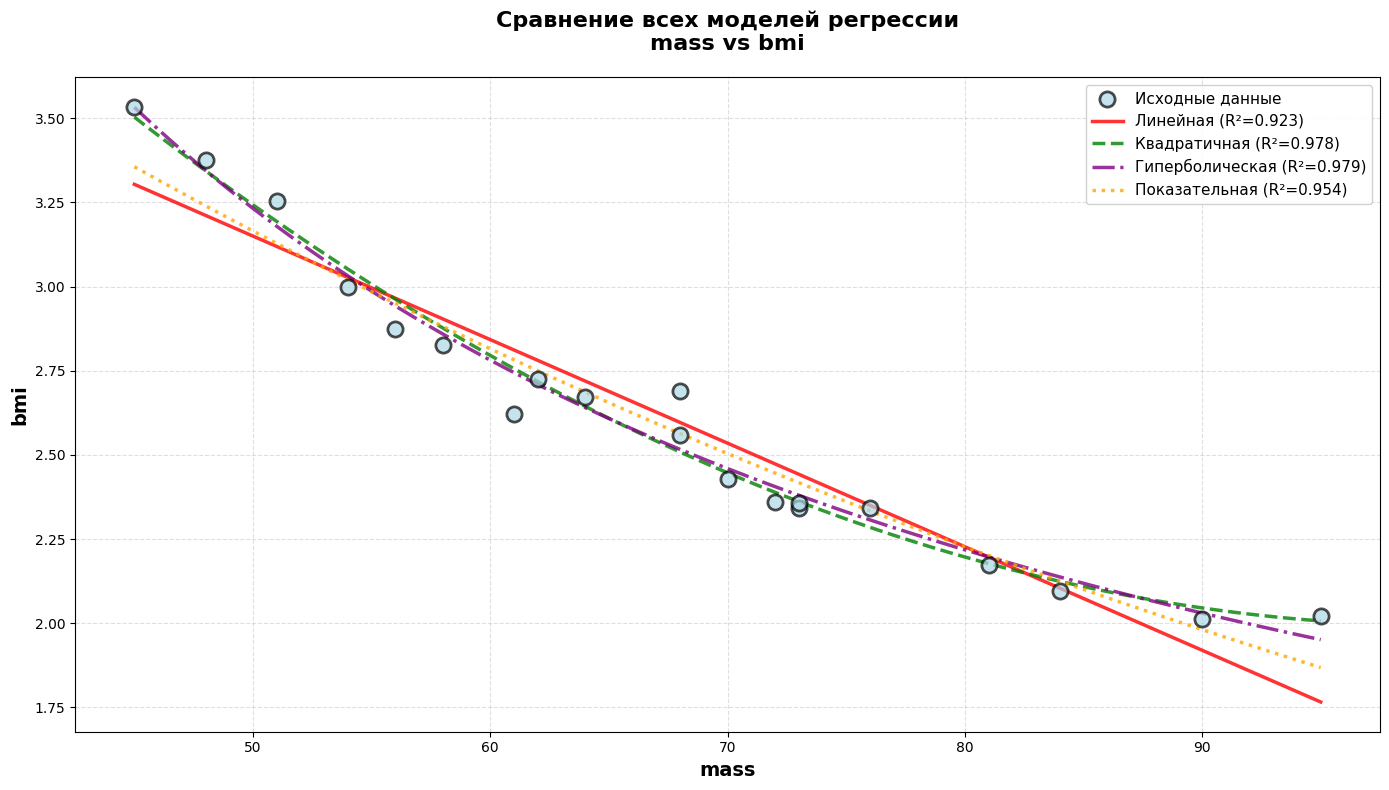

In [46]:
# Сравнение всех моделей на одном графике
fig, ax = plt.subplots(figsize=(14, 8))

# Исходные данные
ax.scatter(x, y, alpha=0.7, s=120, edgecolors='black', 
           linewidth=2, label='Исходные данные', color='lightblue', zorder=5)

# Добавляем все модели
colors = ['red', 'green', 'purple', 'orange']
linestyles = ['-', '--', '-.', ':']

for (model_name, color, linestyle) in zip(model_names, colors, linestyles):
    if results[model_name] is not None:
        result = results[model_name]
        ax.plot(x_range, result['y_range'], color=color, linewidth=2.5, 
                linestyle=linestyle, 
                label=f'{model_name} (R²={result["r2"]:.3f})', 
                alpha=0.8)

# Оформление
ax.set_xlabel(col_1.name, fontsize=14, fontweight='bold')
ax.set_ylabel(col_2.name, fontsize=14, fontweight='bold')
ax.set_title(f'Сравнение всех моделей регрессии\n{col_1.name} vs {col_2.name}', 
             fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.4, linestyle='--')

plt.tight_layout()
plt.show()

In [47]:
# Итоговая интерпретация результатов
print("="*70)
print("ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ РЕГРЕССИОННОГО АНАЛИЗА")
print("="*70)

# Находим лучшую и худшую модели
valid_results = {name: res for name, res in results.items() if res is not None}
sorted_models = sorted(valid_results.items(), key=lambda x: x[1]['r2'], reverse=True)

print(f"\nПроанализировано моделей: {len(valid_results)}")
print(f"Независимая переменная: {col_1.name}")
print(f"Зависимая переменная: {col_2.name}")

print("\n" + "-"*70)
print("РЕЙТИНГ МОДЕЛЕЙ (по коэффициенту детерминации R²):")
print("-"*70)

for rank, (model_name, result) in enumerate(sorted_models, 1):
    print(f"{rank}. {model_name:20s}")
    print(f"   R² = {result['r2']:.4f}  |  RMSE = {result['rmse']:.4f}  |  MAE = {result['mae']:.4f}")
    print(f"   {result['equation']}")
    print()

# Выводы
best_model = sorted_models[0]
print("-"*70)
print("ВЫВОДЫ:")
print("-"*70)

print(f"Наилучшая модель: {best_model[0]} регрессия")
print(f"   Коэффициент детерминации R² = {best_model[1]['r2']:.4f}")

if best_model[1]['r2'] > 0.7:
    quality = "высокое"
elif best_model[1]['r2'] > 0.5:
    quality = "среднее"
elif best_model[1]['r2'] > 0.3:
    quality = "низкое"
else:
    quality = "очень низкое"

print(f"   Качество модели: {quality}")
print(f"   Уравнение: {best_model[1]['equation']}")

print("\nИнтерпретация R²:")
print(f"   Модель объясняет {best_model[1]['r2']*100:.2f}% вариации зависимой переменной")

# Корреляция vs Регрессия
print("\nСвязь с корреляцией Пирсона:")
print(f"   r = {pearson_r:.4f}")
print(f"   r² = {pearson_r**2:.4f}")
print(f"   R² (линейная регрессия) = {results['Линейная']['r2']:.4f}")
print(f"   Разница: {abs(pearson_r**2 - results['Линейная']['r2']):.6f}")

print("\n" + "="*70)


ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ РЕГРЕССИОННОГО АНАЛИЗА

Проанализировано моделей: 4
Независимая переменная: mass
Зависимая переменная: bmi

----------------------------------------------------------------------
РЕЙТИНГ МОДЕЛЕЙ (по коэффициенту детерминации R²):
----------------------------------------------------------------------
1. Гиперболическая     
   R² = 0.9791  |  RMSE = 0.0614  |  MAE = 0.0476
   y = 135.2427/x + 0.5275

2. Квадратичная        
   R² = 0.9779  |  RMSE = 0.0632  |  MAE = 0.0461
   y = 0.0005*x² + -0.0990*x + 6.9596

3. Показательная       
   R² = 0.9542  |  RMSE = 0.0909  |  MAE = 0.0732
   y = 5.6857 * 0.9884^x

4. Линейная            
   R² = 0.9228  |  RMSE = 0.1181  |  MAE = 0.0969
   y = -0.0308*x + 4.6881

----------------------------------------------------------------------
ВЫВОДЫ:
----------------------------------------------------------------------
Наилучшая модель: Гиперболическая регрессия
   Коэффициент детерминации R² = 0.9791
   Качество модели: выс

In [48]:
from scipy.stats import f

print("="*80)
print("ПРОВЕРКА ЗНАЧИМОСТИ МОДЕЛЕЙ РЕГРЕССИИ С ПОМОЩЬЮ КРИТЕРИЯ ФИШЕРА")
print("="*80)

# Параметры для анализа
alpha = 0.05  # уровень значимости
n = len(y)  # количество наблюдений

# Функция для проверки критерия Фишера
def fisher_test(model_name, y_true, y_pred, k_params):
    """
    Проверка значимости модели с помощью критерия Фишера
    
    Parameters:
    -----------
    model_name : str
        Название модели
    y_true : array
        Истинные значения
    y_pred : array
        Предсказанные значения
    k_params : int
        Количество параметров модели (без свободного члена)
    """
    print(f"\n{'='*80}")
    print(f"МОДЕЛЬ: {model_name}")
    print(f"{'='*80}")
    
    # Вычисляем суммы квадратов
    y_mean = np.mean(y_true)
    
    # Общая сумма квадратов (Total Sum of Squares)
    TSS = np.sum((y_true - y_mean)**2)
    
    # Остаточная сумма квадратов (Residual/Error Sum of Squares)
    RSS = np.sum((y_true - y_pred.flatten())**2)
    
    # Объясненная сумма квадратов (Explained Sum of Squares)
    ESS = TSS - RSS
    
    # Степени свободы
    df_regression = k_params  # степени свободы регрессии
    df_residual = n - k_params - 1  # степени свободы остатков
    
    # Средние квадраты
    MS_regression = ESS / df_regression
    MS_residual = RSS / df_residual
    
    # F-статистика
    F_statistic = MS_regression / MS_residual
    
    # Критическое значение F
    F_critical = f.ppf(1 - alpha, df_regression, df_residual)
    
    # P-значение
    p_value = 1 - f.cdf(F_statistic, df_regression, df_residual)
    
    # Коэффициент детерминации
    R2 = ESS / TSS
    
    # Вывод результатов
    print(f"\nИСХОДНЫЕ ДАННЫЕ:")
    print(f"   Количество наблюдений (n): {n}")
    print(f"   Количество параметров модели (k): {k_params}")
    
    print(f"\nСУММЫ КВАДРАТОВ:")
    print(f"   Общая сумма квадратов (TSS):      {TSS:.4f}")
    print(f"   Объясненная сумма квадратов (ESS): {ESS:.4f}")
    print(f"   Остаточная сумма квадратов (RSS):  {RSS:.4f}")
    
    print(f"\nСТЕПЕНИ СВОБОДЫ:")
    print(f"   Регрессия (df₁):  {df_regression}")
    print(f"   Остатки (df₂):    {df_residual}")
    
    print(f"\nСРЕДНИЕ КВАДРАТЫ:")
    print(f"   Средний квадрат регрессии (MSR): {MS_regression:.4f}")
    print(f"   Средний квадрат остатков (MSE):  {MS_residual:.4f}")
    
    print(f"\nКРИТЕРИЙ ФИШЕРА:")
    print(f"   F-статистика (наблюдаемое):       {F_statistic:.4f}")
    print(f"   F-критическое (α={alpha}):         {F_critical:.4f}")
    print(f"   P-значение:                        {p_value:.6f}")
    print(f"   Коэффициент детерминации (R²):     {R2:.4f}")
    
    print(f"\n{'─'*80}")
    print(f"ПРОВЕРКА ГИПОТЕЗ:")
    print(f"{'─'*80}")
    print(f"H₀: Модель незначима (все коэффициенты равны 0)")
    print(f"H₁: Модель значима (хотя бы один коэффициент ≠ 0)")
    print(f"\nУровень значимости: α = {alpha}")
    
    print(f"\n{'─'*80}")
    print(f"РЕШАЮЩЕЕ ПРАВИЛО:")
    print(f"{'─'*80}")
    print(f"Если F_наблюдаемое > F_критическое → отвергаем H₀")
    print(f"Если P-значение < α → отвергаем H₀")
    
    print(f"\n{'─'*80}")
    print(f"ВЫВОД:")
    print(f"{'─'*80}")
    
    if F_statistic > F_critical or p_value < alpha:
        print(f"F_наблюдаемое ({F_statistic:.4f}) > F_критическое ({F_critical:.4f})")
        print(f"P-значение ({p_value:.6f}) < α ({alpha})")
        print(f"\nВЫВОД: Модель ЗНАЧИМА на уровне {alpha*100}%")
        print(f"   Отвергаем нулевую гипотезу H₀")
        print(f"   Модель адекватно описывает данные")
        print(f"   Регрессионное уравнение статистически значимо")
    else:
        print(f"F_наблюдаемое ({F_statistic:.4f}) ≤ F_критическое ({F_critical:.4f})")
        print(f"P-значение ({p_value:.6f}) ≥ α ({alpha})")
        print(f"\nВЫВОД: Модель НЕЗНАЧИМА на уровне {alpha*100}%")
        print(f"   Не отвергаем нулевую гипотезу H₀")
        print(f"   Модель не описывает данные адекватно")
        print(f"   Регрессионное уравнение статистически незначимо")
    
    print(f"\n{'='*80}\n")
    
    return {
        'F_statistic': F_statistic,
        'F_critical': F_critical,
        'p_value': p_value,
        'R2': R2,
        'is_significant': F_statistic > F_critical
    }

# ============================================================================
# 1. КВАДРАТИЧНАЯ РЕГРЕССИЯ
# ============================================================================
quadratic_result = fisher_test(
    model_name="Квадратичная регрессия (y = w₂x² + w₁x + w₀)",
    y_true=y,
    y_pred=results['Квадратичная']['y_pred'],
    k_params=2  # два параметра: w₁ и w₂ (w₀ - свободный член не считается)
)

# ============================================================================
# 2. ПОКАЗАТЕЛЬНАЯ РЕГРЕССИЯ
# ============================================================================
if results['Показательная'] is not None:
    exponential_result = fisher_test(
        model_name="Показательная регрессия (y = w₀ · w₁ˣ)",
        y_true=y,
        y_pred=results['Показательная']['y_pred'],
        k_params=1  # один параметр: w₁ (после логарифмирования)
    )
else:
    print("\nПоказательная регрессия не была построена")

# ============================================================================
# СРАВНИТЕЛЬНАЯ ТАБЛИЦА
# ============================================================================
print("="*80)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*80)

comparison_data = {
    'Модель': ['Квадратичная', 'Показательная'],
    'F-статистика': [
        quadratic_result['F_statistic'],
        exponential_result['F_statistic'] if results['Показательная'] is not None else np.nan
    ],
    'F-критическое': [
        quadratic_result['F_critical'],
        exponential_result['F_critical'] if results['Показательная'] is not None else np.nan
    ],
    'P-значение': [
        quadratic_result['p_value'],
        exponential_result['p_value'] if results['Показательная'] is not None else np.nan
    ],
    'R²': [
        quadratic_result['R2'],
        exponential_result['R2'] if results['Показательная'] is not None else np.nan
    ],
    'Значима?': [
        'Да' if quadratic_result['is_significant'] else 'Нет',
        'Да' if results['Показательная'] is not None and exponential_result['is_significant'] else 'Нет'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))
print("="*80)


ПРОВЕРКА ЗНАЧИМОСТИ МОДЕЛЕЙ РЕГРЕССИИ С ПОМОЩЬЮ КРИТЕРИЯ ФИШЕРА

МОДЕЛЬ: Квадратичная регрессия (y = w₂x² + w₁x + w₀)

ИСХОДНЫЕ ДАННЫЕ:
   Количество наблюдений (n): 20
   Количество параметров модели (k): 2

СУММЫ КВАДРАТОВ:
   Общая сумма квадратов (TSS):      3.6143
   Объясненная сумма квадратов (ESS): 3.5345
   Остаточная сумма квадратов (RSS):  0.0798

СТЕПЕНИ СВОБОДЫ:
   Регрессия (df₁):  2
   Остатки (df₂):    17

СРЕДНИЕ КВАДРАТЫ:
   Средний квадрат регрессии (MSR): 1.7673
   Средний квадрат остатков (MSE):  0.0047

КРИТЕРИЙ ФИШЕРА:
   F-статистика (наблюдаемое):       376.6424
   F-критическое (α=0.05):         3.5915
   P-значение:                        0.000000
   Коэффициент детерминации (R²):     0.9779

────────────────────────────────────────────────────────────────────────────────
ПРОВЕРКА ГИПОТЕЗ:
────────────────────────────────────────────────────────────────────────────────
H₀: Модель незначима (все коэффициенты равны 0)
H₁: Модель значима (хотя бы один коэффициен